In [2]:
# Import libraries  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb

In [3]:
iris = pd.read_csv("iris.csv")

In [4]:
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety  total_value
0           5.1          3.5           1.4          0.2  Setosa         10.2
1           4.9          3.0           1.4          0.2  Setosa          9.5
2           4.7          3.2           1.3          0.2  Setosa          9.4
3           4.6          3.1           1.5          0.2  Setosa          9.4
4           5.0          3.6           1.4          0.2  Setosa         10.2


In [5]:
print(iris.shape)

(150, 6)


In [6]:
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety',
       'total_value'],
      dtype='object')


In [7]:
print(iris['variety'].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


In [8]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   total_value   150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB
None


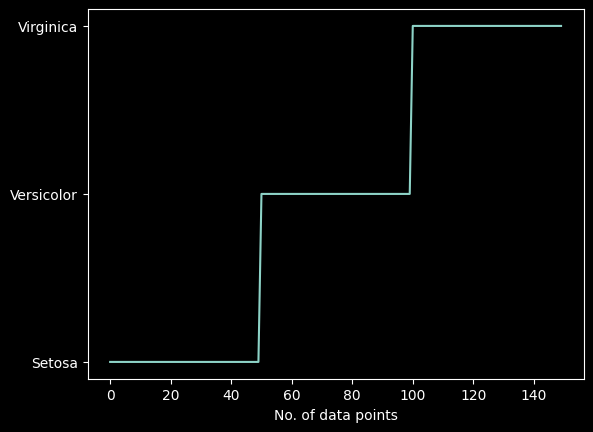

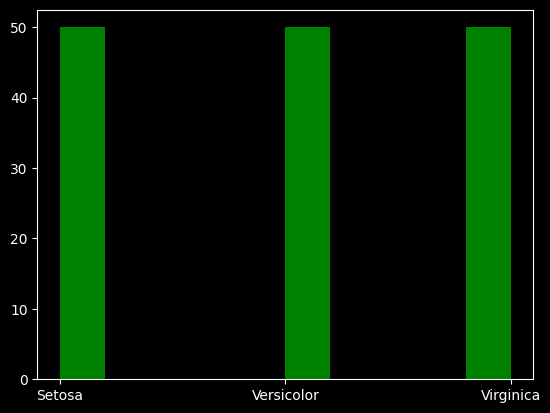

In [9]:
plt.plot(iris['variety'])
plt.xlabel('No. of data points')
plt.show()

plt.hist(iris['variety'], color='green')
plt.show()

In [10]:
print(iris.describe())

       sepal.length  sepal.width  petal.length  petal.width  total_value
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333    13.858000
std        0.828066     0.435866      1.765298     0.762238     3.123762
min        4.300000     2.000000      1.000000     0.100000     8.400000
25%        5.100000     2.800000      1.600000     0.300000    10.700000
50%        5.800000     3.000000      4.350000     1.300000    14.300000
75%        6.400000     3.300000      5.100000     1.800000    16.250000
max        7.900000     4.400000      6.900000     2.500000    20.400000


[]

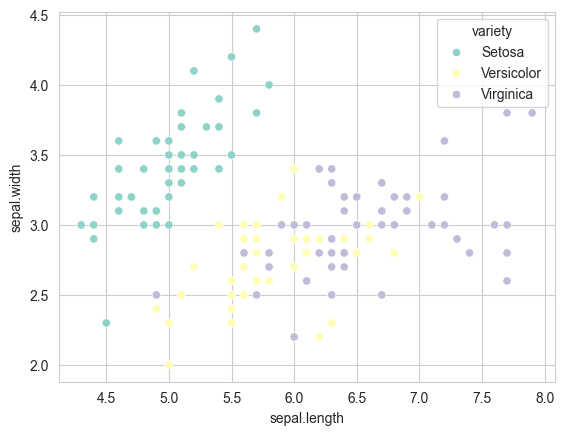

In [11]:
sb.set_style('whitegrid')
sb.scatterplot(data=iris, x='sepal.length', y='sepal.width', hue='variety')
plt.plot()

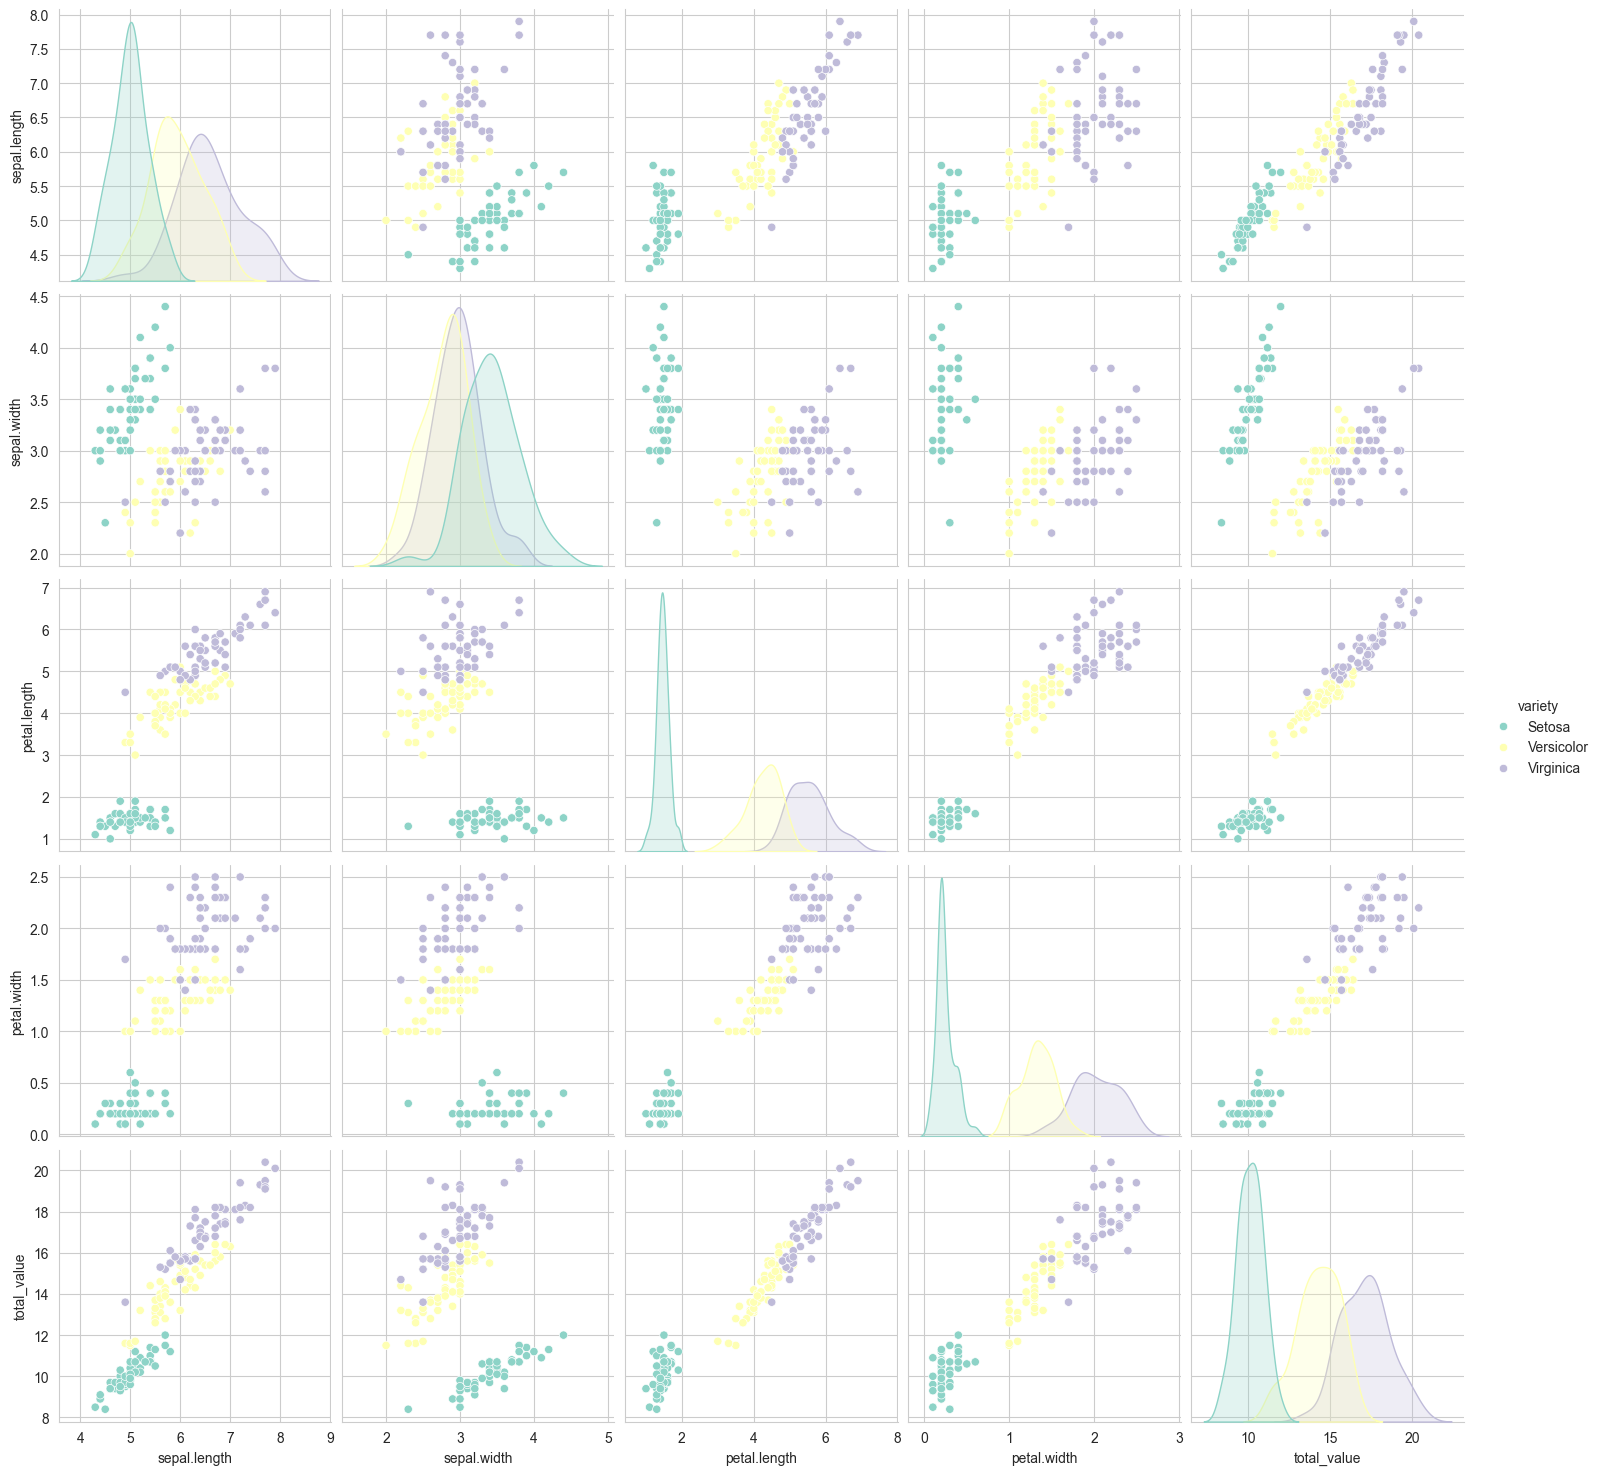

In [12]:
sb.set_style('whitegrid')
# sb.pairplot(iris, hue='variety', size=3)
sb.pairplot(iris, hue='variety', height=3)
plt.show()

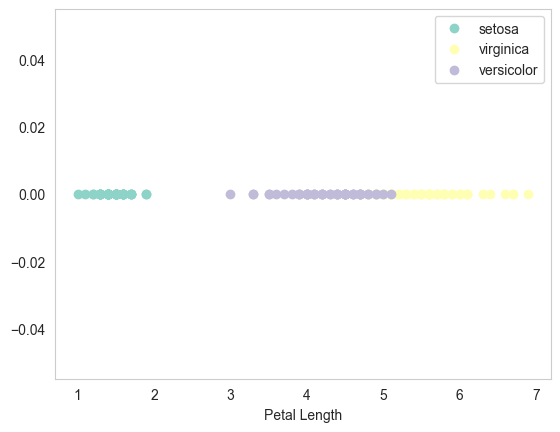

In [13]:
iris_setosa = iris.loc[iris['variety'] == 'Setosa']
iris_versicolor = iris.loc[iris['variety'] == 'Versicolor']
iris_virginica = iris.loc[iris['variety'] == 'Virginica']

plt.plot(iris_setosa['petal.length'], np.zeros_like(iris_setosa['petal.length']), 'o', label='setosa')
plt.plot(iris_virginica['petal.length'], np.zeros_like(iris_virginica['petal.length']), 'o', label='virginica')
plt.plot(iris_versicolor['petal.length'], np.zeros_like(iris_versicolor['petal.length']), 'o', label='versicolor')
plt.xlabel('Petal Length')
plt.grid()
plt.legend()
# plt.ylim(-1, 1)  # <<< important
plt.show()


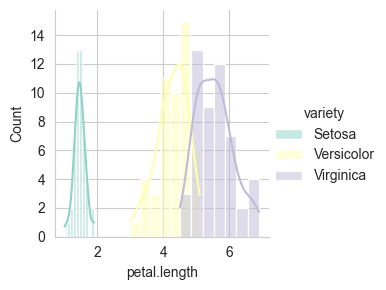

In [14]:
sb.FacetGrid(iris, hue='variety').map(sb.histplot, 'petal.length', kde=True).add_legend()
plt.show()

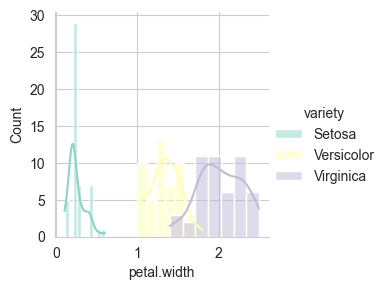

In [15]:
sb.FacetGrid(iris, hue='variety').map(sb.histplot, 'petal.width', kde=True).add_legend()
plt.show()

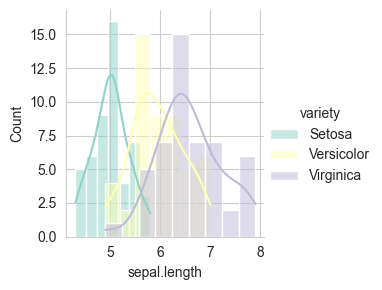

In [16]:
sb.FacetGrid(iris, hue='variety').map(sb.histplot, 'sepal.length', kde=True).add_legend()
plt.show()

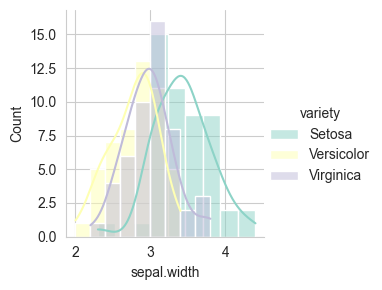

In [17]:
sb.FacetGrid(iris, hue='variety').map(sb.histplot, 'sepal.width', kde=True).add_legend()
plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


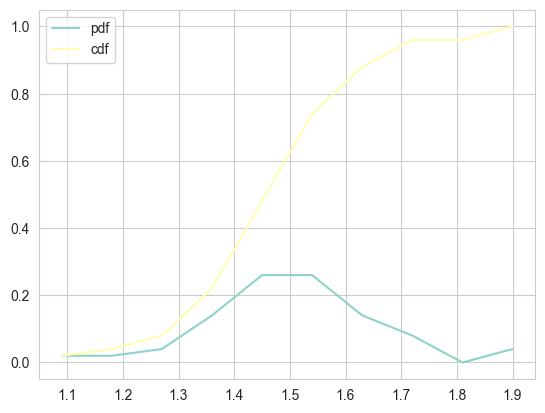

In [18]:
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, density=True)
pdf = counts / sum(counts)

print(pdf)  
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.legend()
plt.show()

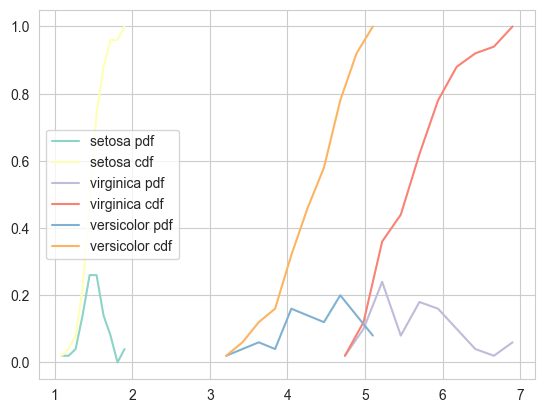

In [19]:

for data, label in zip([iris_setosa, iris_virginica, iris_versicolor], ['setosa', 'virginica', 'versicolor']):
    counts, bin_edges = np.histogram(data['petal.length'], bins=10, density=True)
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label=f'{label} pdf')
    plt.plot(bin_edges[1:], cdf, label=f'{label} cdf')

plt.legend()
plt.show()


In [20]:
print("Means")
print("setosa", np.mean(iris_setosa["petal.length"]))
print("versicolor", np.mean(iris_versicolor["petal.length"]))
print("virginica", np.mean(iris_virginica["petal.length"]))

print("\nstandard-deviation")
print("setosa      :", np.std(iris_setosa["petal.length"]))
print("versicolor  :", np.std(iris_versicolor["petal.length"]))
print("virginica   :", np.std(iris_virginica["petal.length"]))

print("\nmedian")
print("setosa      :", np.median(iris_setosa["petal.length"]))
print("versicolor  :", np.median(iris_versicolor["petal.length"]))
print("virginica   :", np.median(iris_virginica["petal.length"]))


Means
setosa 1.4620000000000002
versicolor 4.26
virginica 5.5520000000000005

standard-deviation
setosa      : 0.17191858538273283
versicolor  : 0.4651881339845203
virginica   : 0.546347874526844

median
setosa      : 1.5
versicolor  : 4.35
virginica   : 5.55


In [21]:
print("90th percentile")
print("setosa:", np.percentile(iris_setosa["petal.length"], 90))
print("versicolor:", np.percentile(iris_versicolor["petal.length"], 90))
print("virginica:", np.percentile(iris_virginica["petal.length"], 90))


90th percentile
setosa: 1.7
versicolor: 4.8
virginica: 6.31


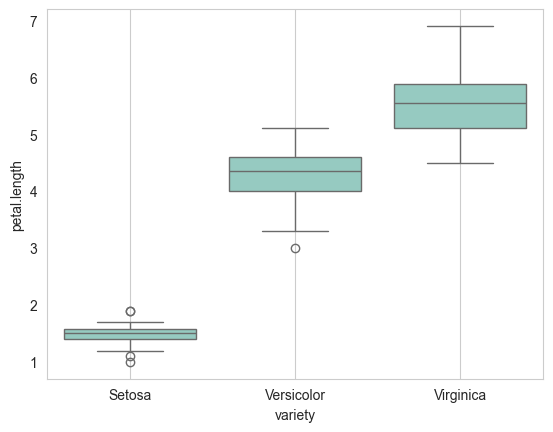

In [22]:
sb.boxplot(x='variety', y='petal.length', data=iris)
plt.grid()
plt.show()

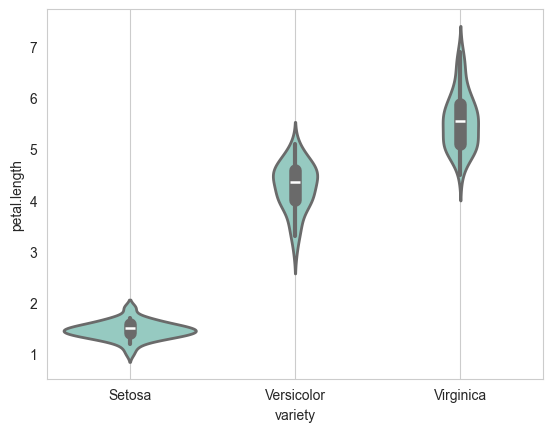

In [23]:
sb.violinplot(x='variety', y='petal.length', data=iris, linewidth=2)
plt.grid()
plt.show()

In [24]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal.length', y='sepal.width', z='petal.width', color='variety')
fig.show()